In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Define neccessary functions

```python
def angle(vector1, vector2):
```    
    Calculates the angle between two vectors.

    Parameters:
    vector1 (numpy.ndarray): The first vector.
    vector2 (numpy.ndarray): The second vector.

    Returns:
    float: The angle between the two vectors in radians.

In [2]:
def angle(vector1, vector2):
    arg1 = np.cross(vector1, vector2)
    arg2 = np.dot(vector1, vector2)
    a = np.arctan2(arg1, arg2)
    return a

```python
def turning_walker(gamma = 1, omega = 0.07,dt = 0.01, T = 100,tau = 50,eta = 0.2):
```    
    Simulates the movement of a turning walker.

    Parameters:
    - gamma (float): The decay rate of the walker's angular velocity.
    - omega (float): The noise intensity of the walker's angular velocity.
    - dt (float): The time step size.
    - T (float): The total simulation time.
    - tau (float): The time at which the walker starts responding to the environment.
    - eta (float): The response strength of the walker to the environment.

    Returns:
    - x (ndarray): The position of the walker at each time step.
    - θ (ndarray): The orientation of the walker at each time step.
    - w (ndarray): The angular velocity of the walker at each time step.
    - w_star (ndarray): The desired angular velocity of the walker at each time step.


In [3]:
def turning_walker(gamma = 1, omega = 0.07,dt = 0.01, T = 100,tau = 50,eta = 0.2):

    N = int(T/dt)
    w = np.zeros(N)
    x = np.zeros((N,2))
    θ = np.zeros(N)
    w_star = np.zeros(N)
    
    for i in range(1, N):
        w[i] = w[i-1]* np.exp(-gamma*dt) + w_star[i-1]*(1- np.exp(-gamma*dt)) + np.random.normal(0, np.sqrt(omega*(1+np.exp(-2*gamma*dt))))
        θ[i] = θ[i-1] + w[i-1]*dt
        x[i] = x[i-1] + dt*np.array([np.cos(θ[i-1]), np.sin(θ[i-1])])
        if i*dt > tau:
            w_star[i] = eta*angle([np.cos(θ[i-1]), np.sin(θ[i-1])],-x[i-1])
        
    return x, θ, w, w_star


#### Task 1 , gamma  = 0

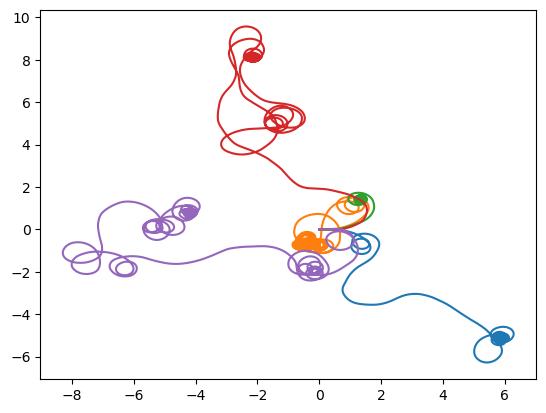

In [4]:
for i in range(5):
    X, Theta, W, W_star =  turning_walker(omega = 0.007, tau= 40, gamma = 0, eta = 0.0)
    plt.plot(X[:,0], X[:,1])

In [5]:
def MSD(x):
    N = len(x)
    msd = np.zeros(N)
    for t in range(N):
        msd[t] = (np.linalg.norm(x[t] - x[0]))**2
    return msd

### Single bee

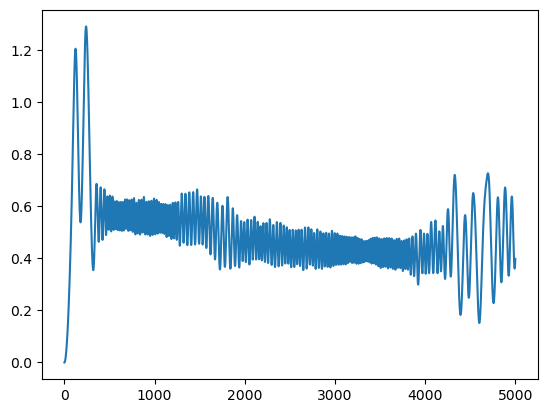

In [6]:
X, Theta, W, W_star =  turning_walker(omega = 0.07, tau= 40, gamma = 0, eta = 0.0, T = 50)
plt.plot(MSD(X))

### 100 bees

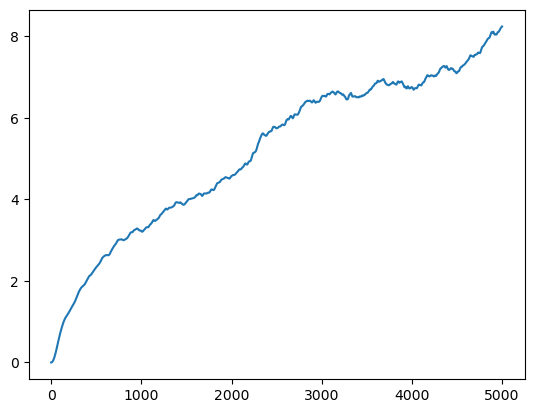

In [7]:
MSD_ensemble = np.zeros(len(X))
runs = 200
for i in range(runs):
    X, Theta, W, W_star =  turning_walker(omega = 0.07, tau= 40, gamma = 0, eta = 0.0, T = 50)
    MSD_ensemble += MSD(X)
MSD_100 = MSD_ensemble/runs
plt.plot(MSD_100)

### Task 2 w_star = 0

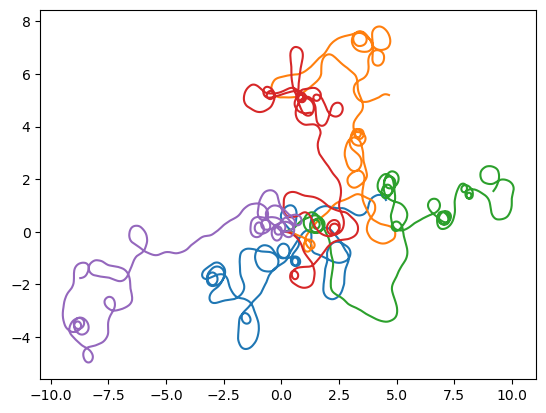

In [8]:
for i in range(5):
    X, Theta, W, W_star =  turning_walker(omega = 0.07, gamma = 1, eta = 0.0, T = 50)
    plt.plot(X[:,0], X[:,1])

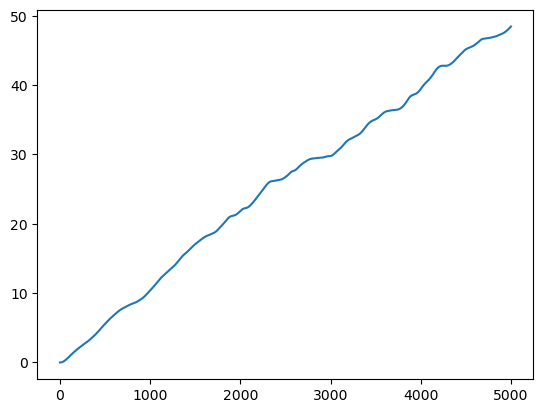

In [9]:
MSD_ensemble = np.zeros(len(X))
runs = 200
for i in range(runs):
    X, Theta, W, W_star =  turning_walker(omega = 0.07, gamma = 1, eta = 0.0, T = 50)
    MSD_ensemble += MSD(X)
MSD_100 = MSD_ensemble/runs
plt.plot(MSD_100)

### Task 3 everything

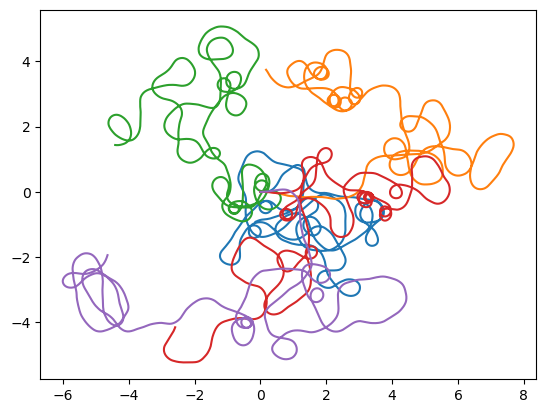

In [10]:
for i in range(5):
    X, Theta, W, W_star =  turning_walker(omega = 0.07, gamma = 1, eta = 0.8, T = 50, tau =25)
    plt.plot(X[:,0], X[:,1])

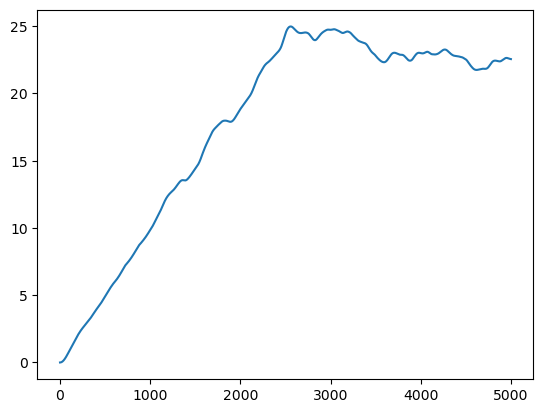

In [11]:
MSD_ensemble = np.zeros(len(X))
runs = 200
for i in range(runs):
    X, Theta, W, W_star =  turning_walker(omega = 0.07, gamma = 1, eta = 0.8, T = 50, tau = 25)
    MSD_ensemble += MSD(X)
MSD_100 = MSD_ensemble/runs
plt.plot(MSD_100)

In [25]:
def distance_bee(x):
    N = len(x)
    d = np.zeros(N)
    for t in range(N):
        d[t] = np.linalg.norm(x[t])
    return d

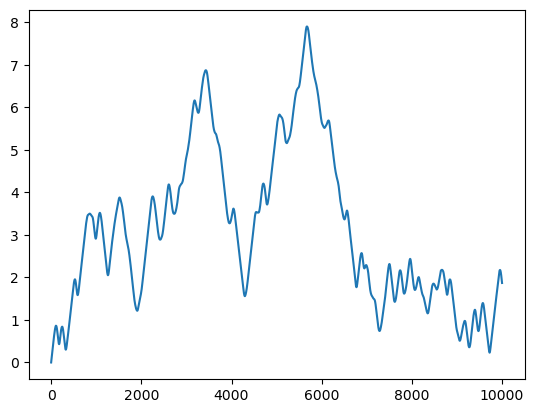

In [26]:
X, Theta, W, W_star =  turning_walker(omega = 0.07, gamma = 1, eta = 0.9)
plt.plot(distance_bee(X))

### Returning Bee

In [50]:
def turning_walker_return(gamma = 1, omega = 0.07,dt = 0.01, T = 100,tau = 50,eta = 0.2, return_dist = 13):
    
    N = int(T/dt)
    w = np.zeros(N)
    x = np.zeros((N,2))
    θ = np.zeros(N)
    w_star = np.zeros(N)
    j = 1
    trips = 0
    trip_flag = 0

    for i in range(1, N):
        w[i] = w[i-1]* np.exp(-gamma*dt) + w_star[i-1]*(1- np.exp(-gamma*dt)) + np.random.normal(0, np.sqrt(omega*(1+np.exp(-2*gamma*dt))))
        θ[i] = θ[i-1] + w[i-1]*dt
        x[i] = x[i-1] + dt*np.array([np.cos(θ[i-1]), np.sin(θ[i-1])])
        if j*dt > tau:
            w_star[i] = eta*angle([np.cos(θ[i-1]), np.sin(θ[i-1])],-x[i-1])
        if np.linalg.norm(x[i]) > return_dist:
            trip_flag = 1
        
        if np.linalg.norm(x[i]) < return_dist and trip_flag == 1:
            trips += 1
            trip_flag = 0
            x[i] = np.array([0.0,0.0])
            θ[i] = 0.0
            w[i] = 0.0
            w_star[i] = 0.0
            j = 0
        j = +1 
        
    return x, θ, w, w_star, trips

In [56]:
trips_all = 0
for i in range(100):
    X_r, Sigma_r, W_r , W_star_r, t = turning_walker_return(eta = 0.8,omega = 0.007, return_dist = 5, T = 100, tau = 10)
    trips_all += t
print(trips_all/100)

1.16


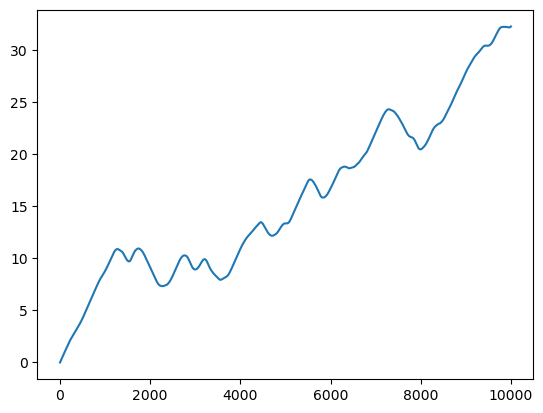

In [57]:
plt.plot(distance_bee(X_r))